In [ ]:
import torch
from torch import nn
from d2l import torch as d2l
import torch.optim as optimizer

T = 1000
time = torch.arange(1,T+1,dtype = torch.float32)
x = torch.sin(0.01 * time) + torch.normal(0,0.2,(T,))
d2l.plot(time,[x],'time','x',xlim = [1,1000],figsize=(6,3))

In [ ]:
tau = 4
features = torch.zeros((T - tau,tau))
for i in range(tau):
    features[:,i] = x[i:T-tau +i]
labels = x[tau:].reshape((-1,1))

batch_size,n_train = 16,600
train_iter = d2l.load_array((features[:n_train],labels[:n_train]),batch_size,is_train = True)


In [ ]:
def init_weights(m):
    if type(m) == nn.Linear:
        nn.init.xavier_uniform_(m.weight)

def get_net():
    net = nn.Sequential(nn.Linear(4,10),nn.ReLU(),nn.Linear(10,1))
    net.apply(init_weights)
    return net


loss = nn.MSELoss(reduction = 'none')

In [ ]:
def train(net,train_iter,loss,epochs,lr):
    trainer = optimizer.Adam(net.parameters(),lr)
    for epoch in range(epochs):
        for X,y in train_iter:
            trainer.zero_grad()
            l = loss(net(X),y)
            l.sum().backward()
            trainer.step()
        print('迭代:{:>3},损失:{:.6}'.format(epoch + 1,d2l.evaluate_loss(net,train_iter,loss)))
        if epoch ==50:
            lr *=0.1 
net = get_net()
train(net,train_iter,loss,100,0.001)

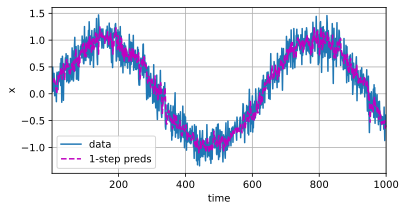

In [83]:
onestep_preds = net(features)
d2l.plot(
    [time,time[tau:]],
    [x.detach().numpy(),onestep_preds.detach().numpy()],'time','x',legend = ['data','1-step preds'],xlim=[1,1000],figsize=(6,3)
)